In [18]:
%reset

In [14]:
import torch
import torchvision.models as models
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from lib.alexnet import AlexNetFeatures
import lib.utils as utils

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [2]:
model = models.alexnet(pretrained=True).to(DEVICE)

In [3]:
model._modules

OrderedDict([('features',
              Sequential(
                (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
                (1): ReLU(inplace=True)
                (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
                (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
                (4): ReLU(inplace=True)
                (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
                (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (7): ReLU(inplace=True)
                (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (9): ReLU(inplace=True)
                (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (11): ReLU(inplace=True)
                (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
              

In [4]:
layer = model._modules.get("features")[7]
layer

ReLU(inplace=True)

In [5]:
train_imgs, train_labels = utils.load_train_images(as_pil=True)
print(len(train_imgs))

3500


In [6]:
alexnet_features = AlexNetFeatures()

In [8]:
emb = alexnet_features.get_embedding(train_imgs[0])
emb.shape

(64896,)

In [9]:
emb

array([0.       , 1.5246513, 6.6109257, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [10]:
train_embs = alexnet_features.get_embeddings(train_imgs)
train_embs.shape

(3500, 64896)

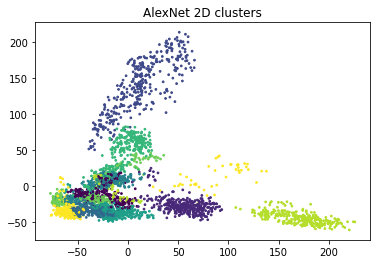

In [16]:
pca_2 = PCA(n_components=2)
pca_2.fit(train_embs)
train_features_2d = pca_2.transform(train_embs)

plt.scatter(train_features_2d[:, 0], train_features_2d[:, 1], s=3, c=train_labels, cmap="viridis")
plt.title("AlexNet 2D clusters")
plt.show()

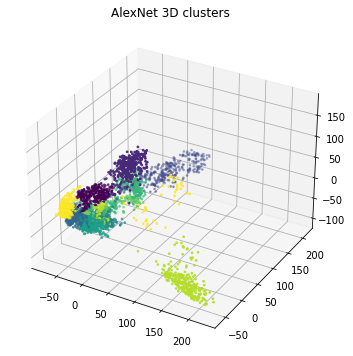

In [17]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

pca_3 = PCA(n_components=3)
pca_3.fit(train_embs)
train_features_3d = pca_3.transform(train_embs)

ax.scatter(train_features_3d[:, 0], train_features_3d[:, 1], train_features_3d[:, 2], s=3, c=train_labels, cmap="viridis")
plt.title("AlexNet 3D clusters")
plt.show()